
### Problema 3: Un instructor de programación recolectó datos de 150 estudiantes registrando las horas de práctica semanal y sus puntuaciones finales en el examen. Quiere determinar si existe una relación lineal entre estas variables y poder predecir la puntuación esperada según las horas de práctica.

#### Cargar y explorar los datos del archivo CSV


In [21]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

datos = pd.read_csv("PracticaExamenes.csv")
print(datos.head())
print(datos.describe())
print(datos.info())

   horas  puntuacion
0      3          64
1      4          67
2      6          76
3      3          65
4      5          72
            horas  puntuacion
count  150.000000  150.000000
mean     3.513333   65.360000
std      1.759868    9.277439
min      1.000000   50.000000
25%      2.000000   58.000000
50%      4.000000   66.000000
75%      5.000000   73.000000
max      6.000000   80.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   horas       150 non-null    int64
 1   puntuacion  150 non-null    int64
dtypes: int64(2)
memory usage: 2.5 KB
None


#### Realizar un analisis de regersion lineal simple 

In [22]:
X = datos[['horas']].values.reshape(-1,1) 
y = datos['puntuacion']
modelo = LinearRegression()
modelo.fit(X, y)

LinearRegression()

#### Determinar la ecuacion de la recta de regresion (pendiente e intercepto)

In [23]:
pendiente = modelo.coef_[0]
intercepto = modelo.intercept_
print(f"Ecuación de la recta: y = {pendiente:.2f}x + {intercepto:.2f}")

Ecuación de la recta: y = 5.21x + 47.06


#### Calcular e interpretar el R² (Coeficiente de determinacion)

In [24]:
y_pred = modelo.predict(X)
r2 = r2_score(y, y_pred)
print(f"R² (coeficiente de determinación): {r2:.2f}")

R² (coeficiente de determinación): 0.98


#### Visualizar la relación con un gráfico de dispersión y la linea de regresión

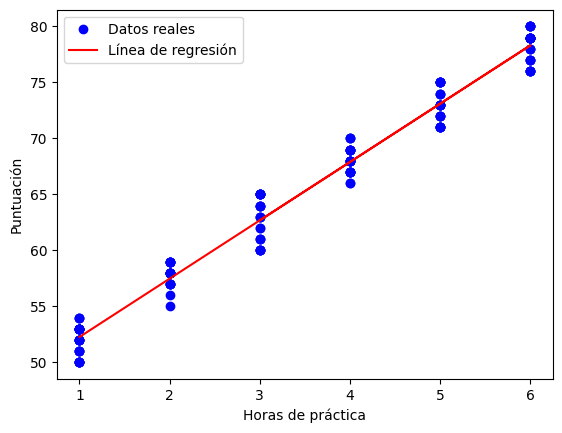

In [25]:
plt.scatter(X, y, color="blue", label="Datos reales")
plt.plot(X, y_pred, color="red", label="Línea de regresión")
plt.xlabel("Horas de práctica")
plt.ylabel("Puntuación")
plt.legend()
plt.show()

#### Permitir hacer predicciones para nuevas cantidades de horas de práctica

In [26]:
nuevas_horas = np.array([[0],[3],[5]]) 
for horas in nuevas_horas:
    prediccion = modelo.predict(horas.reshape(-1,1))
    print(f"Horas de estudio: {horas[0]} - Calificacion estimada: {prediccion[0]:.2f}")

Horas de estudio: 0 - Calificacion estimada: 47.06
Horas de estudio: 3 - Calificacion estimada: 62.69
Horas de estudio: 5 - Calificacion estimada: 73.10
